In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparation du Dataframe d'etude des feature importance

In [2]:
feat_rf = pd.read_csv('./processed_data/featimps_rf_noext_mbrk_v0.csv')
print("Feat RF : ", feat_rf.shape)
feat_rf_new = pd.read_csv('./processed_data/featimps_rf_noext_mbrk_3.csv')
print("Feat Log : ", feat_rf_new.shape)
feat_log = pd.read_csv('./processed_data/featimps_lr_noext_mbrk_v0.csv')
print("Feat Log : ", feat_rf_new.shape)

Feat RF :  (223, 3)
Feat Log :  (59, 3)
Feat Log :  (59, 3)


In [3]:
old_top_50 = feat_rf.sort_values(by=['poids'], ascending=False).iloc[:50, :]['feature'].values.tolist()
diff_col = [col for col in old_top_50 if col not in feat_rf_new['feature'].values.tolist()]

In [4]:
len(diff_col)

26

In [27]:
feat_rf[feat_rf['feature'].isin(diff_col)].sort_values(by=['poids'], ascending=False).iloc[:50, :]

,Unnamed: 0,feature,poids
7,84,BURO_AMT_CREDIT_SUM_DEBT_MEAN,0.025792
9,54,NAME_INCOME_TYPE_Working,0.020777
10,80,BURO_DAYS_CREDIT_ENDDATE_MEAN,0.019597
11,92,ACTIVE_DAYS_CREDIT_MAX,0.018675
14,93,ACTIVE_DAYS_CREDIT_MEAN,0.017890
16,96,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,0.016612
17,78,BURO_DAYS_CREDIT_MAX,0.015308
21,135,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,0.010743
22,4,AMT_GOODS_PRICE,0.010466
23,141,PREV_CODE_REJECT_REASON_XAP_MEAN,0.010084


In [28]:
diff_col

['BURO_AMT_CREDIT_SUM_DEBT_MEAN',
 'NAME_INCOME_TYPE_Working',
 'BURO_DAYS_CREDIT_ENDDATE_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'ACTIVE_DAYS_CREDIT_MEAN',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'BURO_DAYS_CREDIT_MAX',
 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN',
 'AMT_GOODS_PRICE',
 'PREV_CODE_REJECT_REASON_XAP_MEAN',
 'PREV_NAME_CLIENT_TYPE_New_MEAN',
 'REFUSED_DAYS_DECISION_MEAN',
 'REGION_POPULATION_RELATIVE',
 'PREV_NAME_PRODUCT_TYPE_NAME_PRODUCT_TYPE_divers_MEAN',
 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN',
 'AMT_CREDIT',
 'CLOSED_DAYS_CREDIT_MEAN',
 'PREV_DAYS_DECISION_MEAN',
 'PREV_APP_CREDIT_PERC_MEAN',
 'REFUSED_APP_CREDIT_PERC_MEAN',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN',
 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN',
 'OCCUPATION_TYPE_Laborers',
 'PREV_AMT_DOWN_PAYMENT_MEAN',
 'AMT_ANNUITY',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN',
 'APPROVED_AMT_DOWN_PAYMENT_MEAN',
 'PREV_NAME_YIELD_GROUP_high_MEAN',
 'APPROVED_AMT_ANNUITY_MEAN']

In [29]:
feat_rf = feat_rf[~feat_rf['feature'].isin([feat for feat in feat_rf['feature'].values.tolist() if feat not in feat_log['feature'].values.tolist()])]
print(feat_rf.shape)

(223, 3)


In [30]:
sdf = feat_rf.merge(feat_log, how='left', on='feature')
sdf.rename(columns = {'poids' : 'rf_poids'}, inplace=True)
sdf = sdf[['feature', 'rf_poids', 'coeflogreg']]

In [31]:
sdf

,feature,rf_poids,coeflogreg
0,BURO_DAYS_CREDIT_MEAN,0.042087,0.200766
1,NAME_EDUCATION_TYPE_CATed,0.040875,-0.147630
2,DAYS_EMPLOYED,0.034732,0.010792
3,CREDIT_TO_GOODS_RATIO,0.034631,0.098294
4,INSTAL_DPD_MEAN,0.032725,0.051481
...,...,...,...
218,CLOSED_AMT_CREDIT_SUM_OVERDUE_MAX,0.000004,0.242572
219,CLOSED_CREDIT_DAY_OVERDUE_MEAN,0.000003,-0.040561
220,NAME_INCOME_TYPE_NAME_INCOME_TYPE_divers,0.000002,-0.016607
221,NAME_FAMILY_STATUS_NAME_FAMILY_STATUS_divers,0.000000,0.000533


In [32]:
sdf['rf_poids'] = np.abs(sdf['rf_poids'])
sdf['rforder'] = np.argsort(-sdf['rf_poids'])
sdf['coeflogreg'] = np.abs(sdf['coeflogreg'])
sdf['lrorder'] = np.argsort(-sdf['coeflogreg'])

In [33]:
sdf.sort_values(by=['rf_poids'], ascending=False)

,feature,rf_poids,coeflogreg,rforder,lrorder
0,BURO_DAYS_CREDIT_MEAN,0.042087,0.200766,0,69
1,NAME_EDUCATION_TYPE_CATed,0.040875,0.147630,1,66
2,DAYS_EMPLOYED,0.034732,0.010792,2,142
3,CREDIT_TO_GOODS_RATIO,0.034631,0.098294,3,77
4,INSTAL_DPD_MEAN,0.032725,0.051481,4,134
...,...,...,...,...,...
218,CLOSED_AMT_CREDIT_SUM_OVERDUE_MAX,0.000004,0.242572,218,221
219,CLOSED_CREDIT_DAY_OVERDUE_MEAN,0.000003,0.040561,219,84
220,NAME_INCOME_TYPE_NAME_INCOME_TYPE_divers,0.000002,0.016607,220,136
221,NAME_FAMILY_STATUS_NAME_FAMILY_STATUS_divers,0.000000,0.000533,221,157


In [36]:
common_feat = sdf[(sdf['rforder']<50) & (sdf['lrorder']<50)]

In [38]:
[feat for feat in common_feat['feature'].values.tolist() if feat not in feat_rf_new['feature'].values.tolist()]

['ACTIVE_DAYS_CREDIT_MEAN',
 'REFUSED_DAYS_DECISION_MEAN',
 'REGION_POPULATION_RELATIVE',
 'CLOSED_DAYS_CREDIT_MEAN',
 'REFUSED_APP_CREDIT_PERC_MEAN',
 'AMT_ANNUITY',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN',
 'APPROVED_AMT_DOWN_PAYMENT_MEAN']

# Etude correlation
15 top features des deux modeles

In [5]:
import mbr_kernel as mkn

GIT_FOLDER = './'
INPUT_FOLDER = GIT_FOLDER + 'input_data/'

df_train = pd.read_csv('./input_data/application_train.csv')
print("Loaded dataframe shape : ", df_train.shape)
df = mkn.full_feature_engineering(df_input=df_train, df_folder=INPUT_FOLDER,encoding_treshold=0.04, nan_treshold=0.4)

Loaded dataframe shape :  (307511, 122)
Forme initiale du Dataframe :  (307511, 122)


/home/maximorose/git_repositories/oc-ds-p07/utilitaires_810.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)
/home/maximorose/git_repositories/oc-ds-p07/mbr_kernel.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
/home/maximorose/git_repositories/oc-ds-p07/mbr_kernel.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Forme du Dataframe apres traitement :  (219656, 122)

Application dataframe shape:  (219656, 19)
application processing - done in 1s
Forme initiale du Dataframe :  (1716428, 17)
Forme du Dataframe apres traitement :  (1716428, 17)
Bureau dataframe shape:  (305811, 14)
Bureau and bureau_balance processing - done in 7s
Forme initiale du Dataframe :  (1670214, 37)


/home/maximorose/git_repositories/oc-ds-p07/utilitaires_810.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)


Forme du Dataframe apres traitement :  (1234578, 37)
Forme initiale du Dataframe :  (13605401, 8)
Forme du Dataframe apres traitement :  (13605401, 8)
Previous Application dataframe shape:  (338308, 12)
Previous application processing - done in 20s
Pos-Cash dataframe shape:  (337252, 3)
Pos-Cash processing - done in 4s
Installement dataframe shape:  (339587, 7)
Installment processing - done in 13s
CC dataframe shape:  (103558, 6)
CC processing - done in 6s


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = StandardScaler()

X = df.drop(columns = ['TARGET'])
y = df['TARGET']

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_imp = imputer.fit_transform(X)

scaler = StandardScaler()
X_sc = scaler.fit_transform(X_imp)

X = pd.DataFrame(X_sc, columns=X.columns.tolist())

X.head(2)

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_COUNT,CC_MONTHS_BALANCE_MEAN,CC_AMT_BALANCE_MEAN,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_LIMIT_USE_MEAN,CC_LATE_PAYMENT_MEAN,CC_DRAWING_LIMIT_RATIO_MEAN
0,-1.733018,-0.221432,1.469844,0.761176,0.569747,-0.040133,0.011708,-0.676501,-2.771432,-1.426540,...,0.074077,-0.287737,1.065073,-0.509010,0.224515,-0.210799,-0.185977,-0.125349,-0.13924,-0.120657
1,-1.733008,0.516461,-0.259450,0.509543,1.780743,-1.951957,-1.935112,-0.372892,-1.267103,0.500434,...,0.074077,1.761740,-0.778501,-0.360101,0.224515,-0.210799,-0.185977,-0.125349,-0.13924,-0.120657


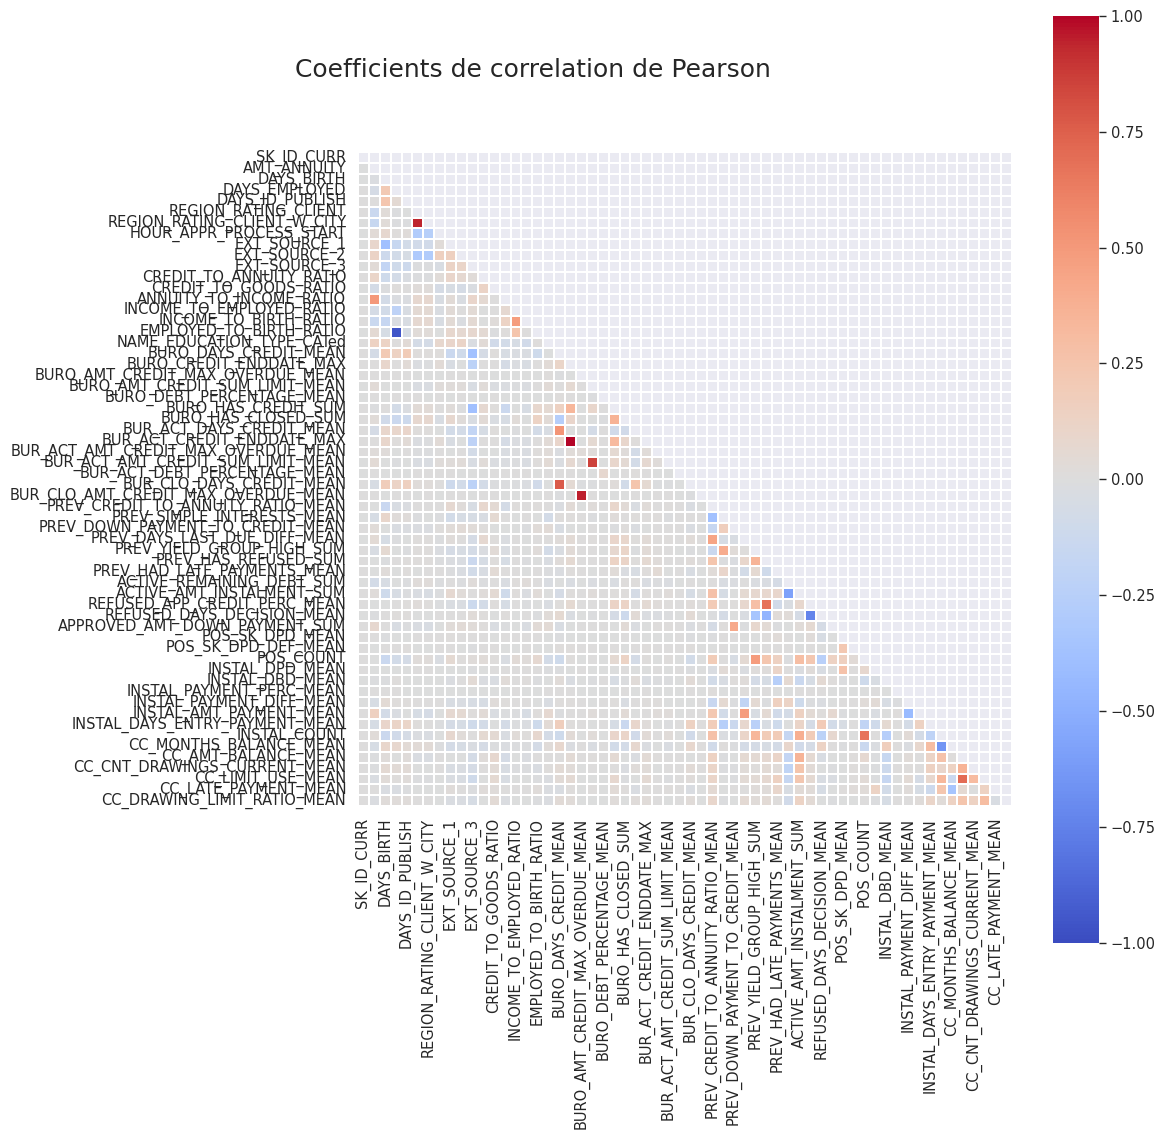

In [9]:
import utilitaires_810 as u810
# smdf = X
# smdf['TARGET'] = y
corrmat = X.corr()
u810.display_corrmat(corrmat, annot=False)

# rf<50 & lr<50

In [ ]:
sub_X = X[sdf[(sdf['rforder']<50) & (sdf['lrorder']<50)]['feature'].values.tolist()]
sub_X.shape

In [ ]:
import utilitaires_810 as u810

df_y = sub_X
df_y['TARGET'] = y
corrmat = df_y.corr()
u810.display_corrmat(corrmat)

In [ ]:
to_remove = ['REFUSED_DAYS_DECISION_MEAN', 'REGION_POPULATION_RELATIVE']
to_keep_list = [col for col in sdf[(sdf['rforder']<50) & (sdf['lrorder']<50)]['feature'].values.tolist() if col not in to_remove]
len(to_keep_list)

# rf<50 & lr>50

In [ ]:
masked_df = sdf[(sdf['rforder']<50) & (sdf['lrorder']>50)]
print("shape masked df : ", masked_df.shape)
wip_feature = [col for col in masked_df['feature'].values.tolist() if (col not in to_remove)|(col not in to_keep_list)]
print(wip_feature)
len(wip_feature)

In [ ]:
sub_X = X[wip_feature]
sub_X.shape

In [ ]:
df_y = sub_X
smdf = df_y.iloc[:, 30:40]
smdf['TARGET'] = y
corrmat = smdf.corr()
u810.display_corrmat(corrmat)

In [ ]:
sdf[sdf['feature'].isin(['PREV_CHANNEL_TYPE_Credit and cash offices_MEAN', 'PREV_PRODUCT_COMBINATION_Cash_MEAN', 'LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION'])]

In [ ]:
[col for col in X.columns if "BAD" in col]

In [ ]:
prev = pd.read_csv('./input_data/previous_application.csv')

In [ ]:
prev['CHANNEL_TYPE'].value_counts()

# rf>50 & lf<50

In [ ]:
masked_df = sdf[(sdf['rforder']>50) & (sdf['lrorder']<50)]
print("shape masked df : ", masked_df.shape)
wip_feature = [col for col in masked_df['feature'].values.tolist() if (col not in to_remove)|(col not in to_keep_list)]
print(wip_feature)
len(wip_feature)

In [ ]:
sub_X = X[wip_feature]
sub_X.shape

In [ ]:
df_y = sub_X
smdf = df_y.iloc[:, 25:40]
smdf['TARGET'] = y
corrmat = smdf.corr()
u810.display_corrmat(corrmat)

In [ ]:
df['PREV_CHANNEL_TYPE_Credit and cash offices_MEAN', 'PREV_PRODUCT_COMBINATION_Cash_MEAN', 'LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION']